#Random forest Classifier model for risk segmentation.

#Features used in the model:

* INSURANCE_TYPE
* PREMIUM_AMOUNT
* CITY
* MARITAL_STATUS
* AGE
* TENURE
* EMPLOYMENT_STATUS
* NO_OF_FAMILY_MEMBERS 
* HOUSE_TYPE
* SOCIAL_CLASS
* RISK_SEGMENTATION





#Libraries.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler


#Opening the csv with pandas.

In [2]:
df = pd.read_csv("/content/insurance_data.csv", usecols=( 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT','CITY',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'HOUSE_TYPE',
       'SOCIAL_CLASS','RISK_SEGMENTATION'))
df

,INSURANCE_TYPE,PREMIUM_AMOUNT,CITY,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS
0,Health,157.13,Glendale,Y,54,89,Y,3,L,Own,LI
1,Property,141.71,Arvada,N,61,80,Y,4,L,Rent,MI
2,Property,157.24,Vallejo,N,47,68,Y,6,L,Rent,MI
3,Health,172.87,Thunderbolt,Y,36,16,Y,7,L,Mortgage,MI
4,Travel,88.53,Livermore,Y,51,16,Y,2,M,Rent,HI
...,...,...,...,...,...,...,...,...,...,...,...
9995,Motor,105.75,Manchester,N,45,98,Y,3,M,Own,MI
9996,Life,64.59,Fayetteville,Y,52,92,Y,3,L,Mortgage,LI
9997,Health,183.50,Anchorage,Y,53,32,Y,2,M,Mortgage,LI
9998,Motor,113.46,Oakland,Y,61,44,Y,7,M,Rent,MI


#Categorical words into categorical numerics.

In [3]:

df['SOCIAL_CLASS'] = df['SOCIAL_CLASS'].astype('category').cat.codes
df['INSURANCE_TYPE'] = df['INSURANCE_TYPE'].astype('category').cat.codes
df['CITY'] = df['CITY'].astype('category').cat.codes
df['RISK_segmentation'] = df['RISK_SEGMENTATION'].astype('category').cat.codes
df['HOUSE_TYPE'] = df['HOUSE_TYPE'].astype('category').cat.codes
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].astype('category').cat.codes
df['EMPLOYMENT_STATUS'] = df['EMPLOYMENT_STATUS'].astype('category').cat.codes


In [ ]:
df.corr()

,INSURANCE_TYPE,PREMIUM_AMOUNT,CITY,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,RISK_segmentation
INSURANCE_TYPE,1.000000,-0.147704,0.003691,-0.021238,0.025841,0.008084,-0.008521,0.005207,-0.001767,0.006746,0.000232,-0.001767
PREMIUM_AMOUNT,-0.147704,1.000000,0.010852,0.007455,-0.011634,0.006190,0.011419,0.000005,-0.005581,0.019688,0.007966,-0.005581
CITY,0.003691,0.010852,1.000000,0.012464,0.008113,0.008007,-0.009975,0.009361,-0.002799,0.025431,-0.007019,-0.002799
MARITAL_STATUS,-0.021238,0.007455,0.012464,1.000000,-0.005509,0.006122,-0.000915,0.009884,-0.016902,0.012752,0.000175,-0.016902
AGE,0.025841,-0.011634,0.008113,-0.005509,1.000000,-0.004507,-0.002160,-0.001442,0.011075,0.011801,0.007797,0.011075
TENURE,0.008084,0.006190,0.008007,0.006122,-0.004507,1.000000,0.001327,-0.007814,0.009556,-0.017814,-0.001196,0.009556
EMPLOYMENT_STATUS,-0.008521,0.011419,-0.009975,-0.000915,-0.002160,0.001327,1.000000,-0.004896,-0.001861,-0.007412,-0.009317,-0.001861
NO_OF_FAMILY_MEMBERS,0.005207,0.000005,0.009361,0.009884,-0.001442,-0.007814,-0.004896,1.000000,-0.012059,0.005948,0.020016,-0.012059
RISK_SEGMENTATION,-0.001767,-0.005581,-0.002799,-0.016902,0.011075,0.009556,-0.001861,-0.012059,1.000000,-0.019132,0.015368,1.000000
HOUSE_TYPE,0.006746,0.019688,0.025431,0.012752,0.011801,-0.017814,-0.007412,0.005948,-0.019132,1.000000,-0.007148,-0.019132


In [4]:
#removes this since its a duplicate
del df['RISK_SEGMENTATION']

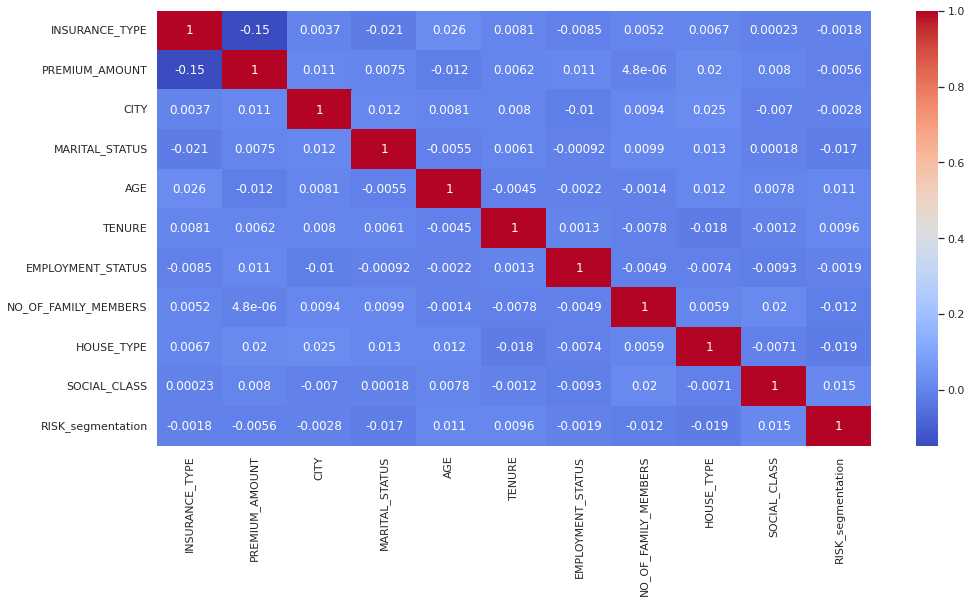

In [5]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

#Features(X) and Target(Y).

In [27]:
X = df[df.columns[:-1]].values
Y = df[[df.columns[-1]]].values

In [28]:
#confirming split

print(X.shape)
print(Y.shape)

(10000, 10)
(10000, 1)


(array([1455.,    0.,    0.,    0.,    0., 4395.,    0.,    0.,    0.,
        4150.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

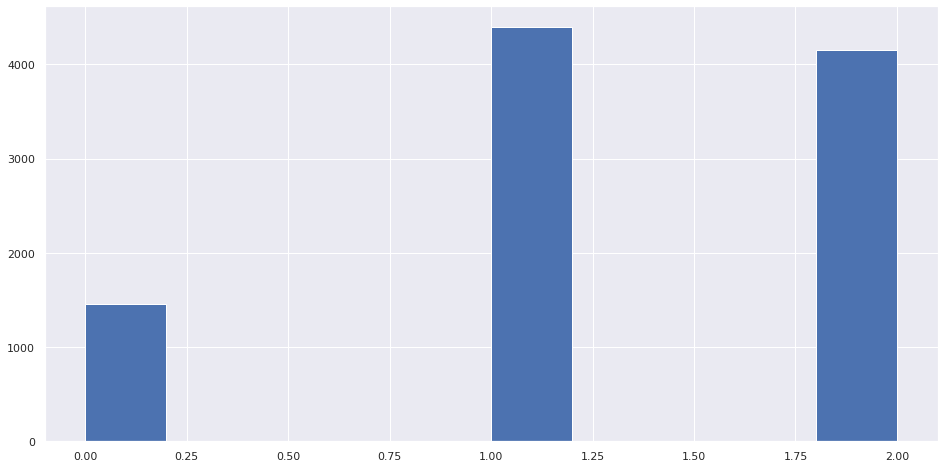

In [29]:
plt.hist(Y)


#Random sampling the data to reduce underfitting.

In [30]:
sample = RandomOverSampler()
X,Y = sample.fit_resample(X,Y)

(array([4395.,    0.,    0.,    0.,    0., 4395.,    0.,    0.,    0.,
        4395.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

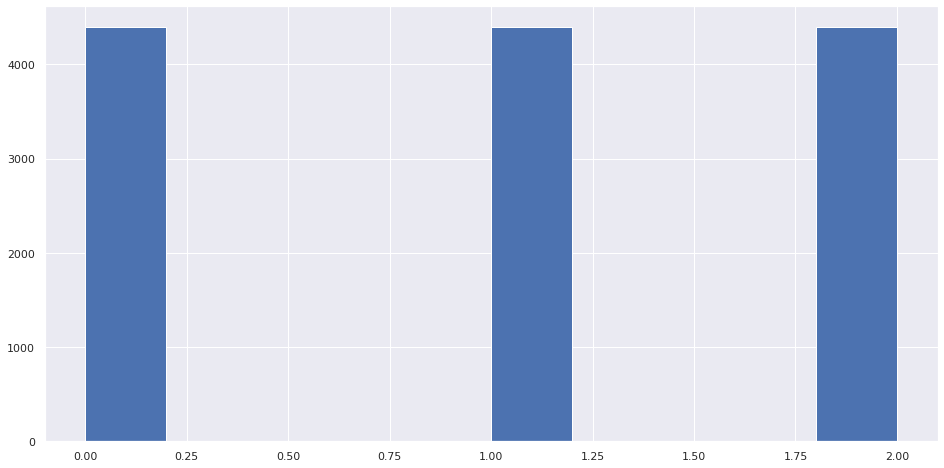

In [31]:
plt.hist(Y)

#Test and train splits.

In [32]:

x_test, x_train_val, y_test, y_train_val = train_test_split(X, Y, random_state=0, test_size = .80)

#confirming split
print(x_test.shape)
print(x_train_val.shape)
print(y_test.shape)
print(y_train_val.shape)

(2637, 10)
(10548, 10)
(2637,)
(10548,)


In [33]:
x_val, x_train, y_val, y_train = train_test_split(x_train_val, y_train_val, random_state=0, test_size = .75001)

#confirming split
print(x_val.shape)
print(x_train.shape)
print(y_val.shape)
print(y_train.shape)

(2636, 10)
(7912, 10)
(2636,)
(7912,)


In [34]:
rf_clf = RandomForestClassifier()

#Fitting on the train data.

In [35]:

rf_clf.fit(x_train,y_train.ravel())

RandomForestClassifier()

#Making a prediction.

In [36]:
y_pred = rf_clf.predict(x_test)
print("Evaluated test_predictions:", y_pred)

Evaluated test_predictions: [2 2 2 ... 1 0 1]


#Accuracy Score.

In [39]:
accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy_score on test dataset : ', (accuracy_test*100).round(2),'%')

accuracy_score on test dataset :  61.7 %
